# Name: Ajit A Gouda

# Batch: DS2311

# Loan Application Status Prediction

## Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

1.Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.Married - This refers to applicant being in a state of matrimony
4.Dependents - This refres to persons who depends on the applicants for survival
5.Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

Dataset Link-  
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Loan%20Application%20Status/loan_prediction.csv


In [105]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

In [3]:
df=pd.read_csv('Loan_dataset.csv')

In [104]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.544331,-1.102837,-0.025462,360.0,1.0,2,1
1,1,1,1,0,0,0.170974,0.750578,-0.025462,360.0,1.0,0,0
2,1,1,0,0,1,-0.499955,-1.102837,-1.339826,360.0,1.0,2,1
3,1,1,0,1,0,-0.743873,0.891686,-0.155876,360.0,1.0,2,1
4,1,0,0,0,0,0.582817,-1.102837,0.170931,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.554885,-1.102837,-1.197589,360.0,1.0,0,1
610,1,1,3,0,0,-0.000290,-1.102837,-2.296436,180.0,1.0,0,1
611,1,1,1,0,0,1.023487,0.208603,1.381387,360.0,1.0,2,1
612,1,1,2,0,0,0.931750,-1.102837,0.750522,360.0,1.0,2,1


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


"Begin by summarizing the distribution of categorical features, including the number of observations in each category and the distinct categories present."

In [7]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Loan_Amount_Term
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Credit_History
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64


## Let check outliers for missing values Numerical variable having missing values by plotting boxplot.

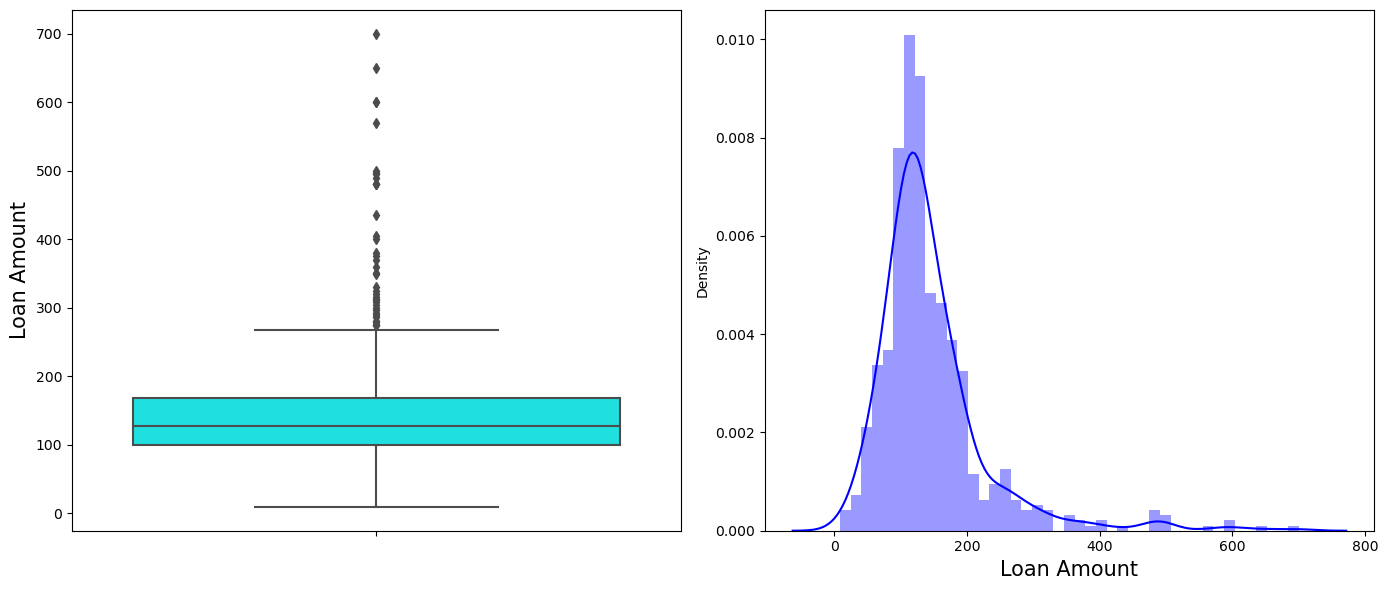

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=df,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

In [11]:
print("Mean of Loan Amount:",df['LoanAmount'].mean())
print("Median of Loan Amount:",df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


#### The analysis reveals a positive skew in the loan amount distribution. This is evident from the mean exceeding the median and the presence of outliers identified in the boxplot. Additionally, the distribution plot visually confirms a stretched tail on one side, further indicating the skewness.As extreme outliers are present in feature and for that reason as data is more sensitive to mean we are going to impute missing values in loan amount with median.

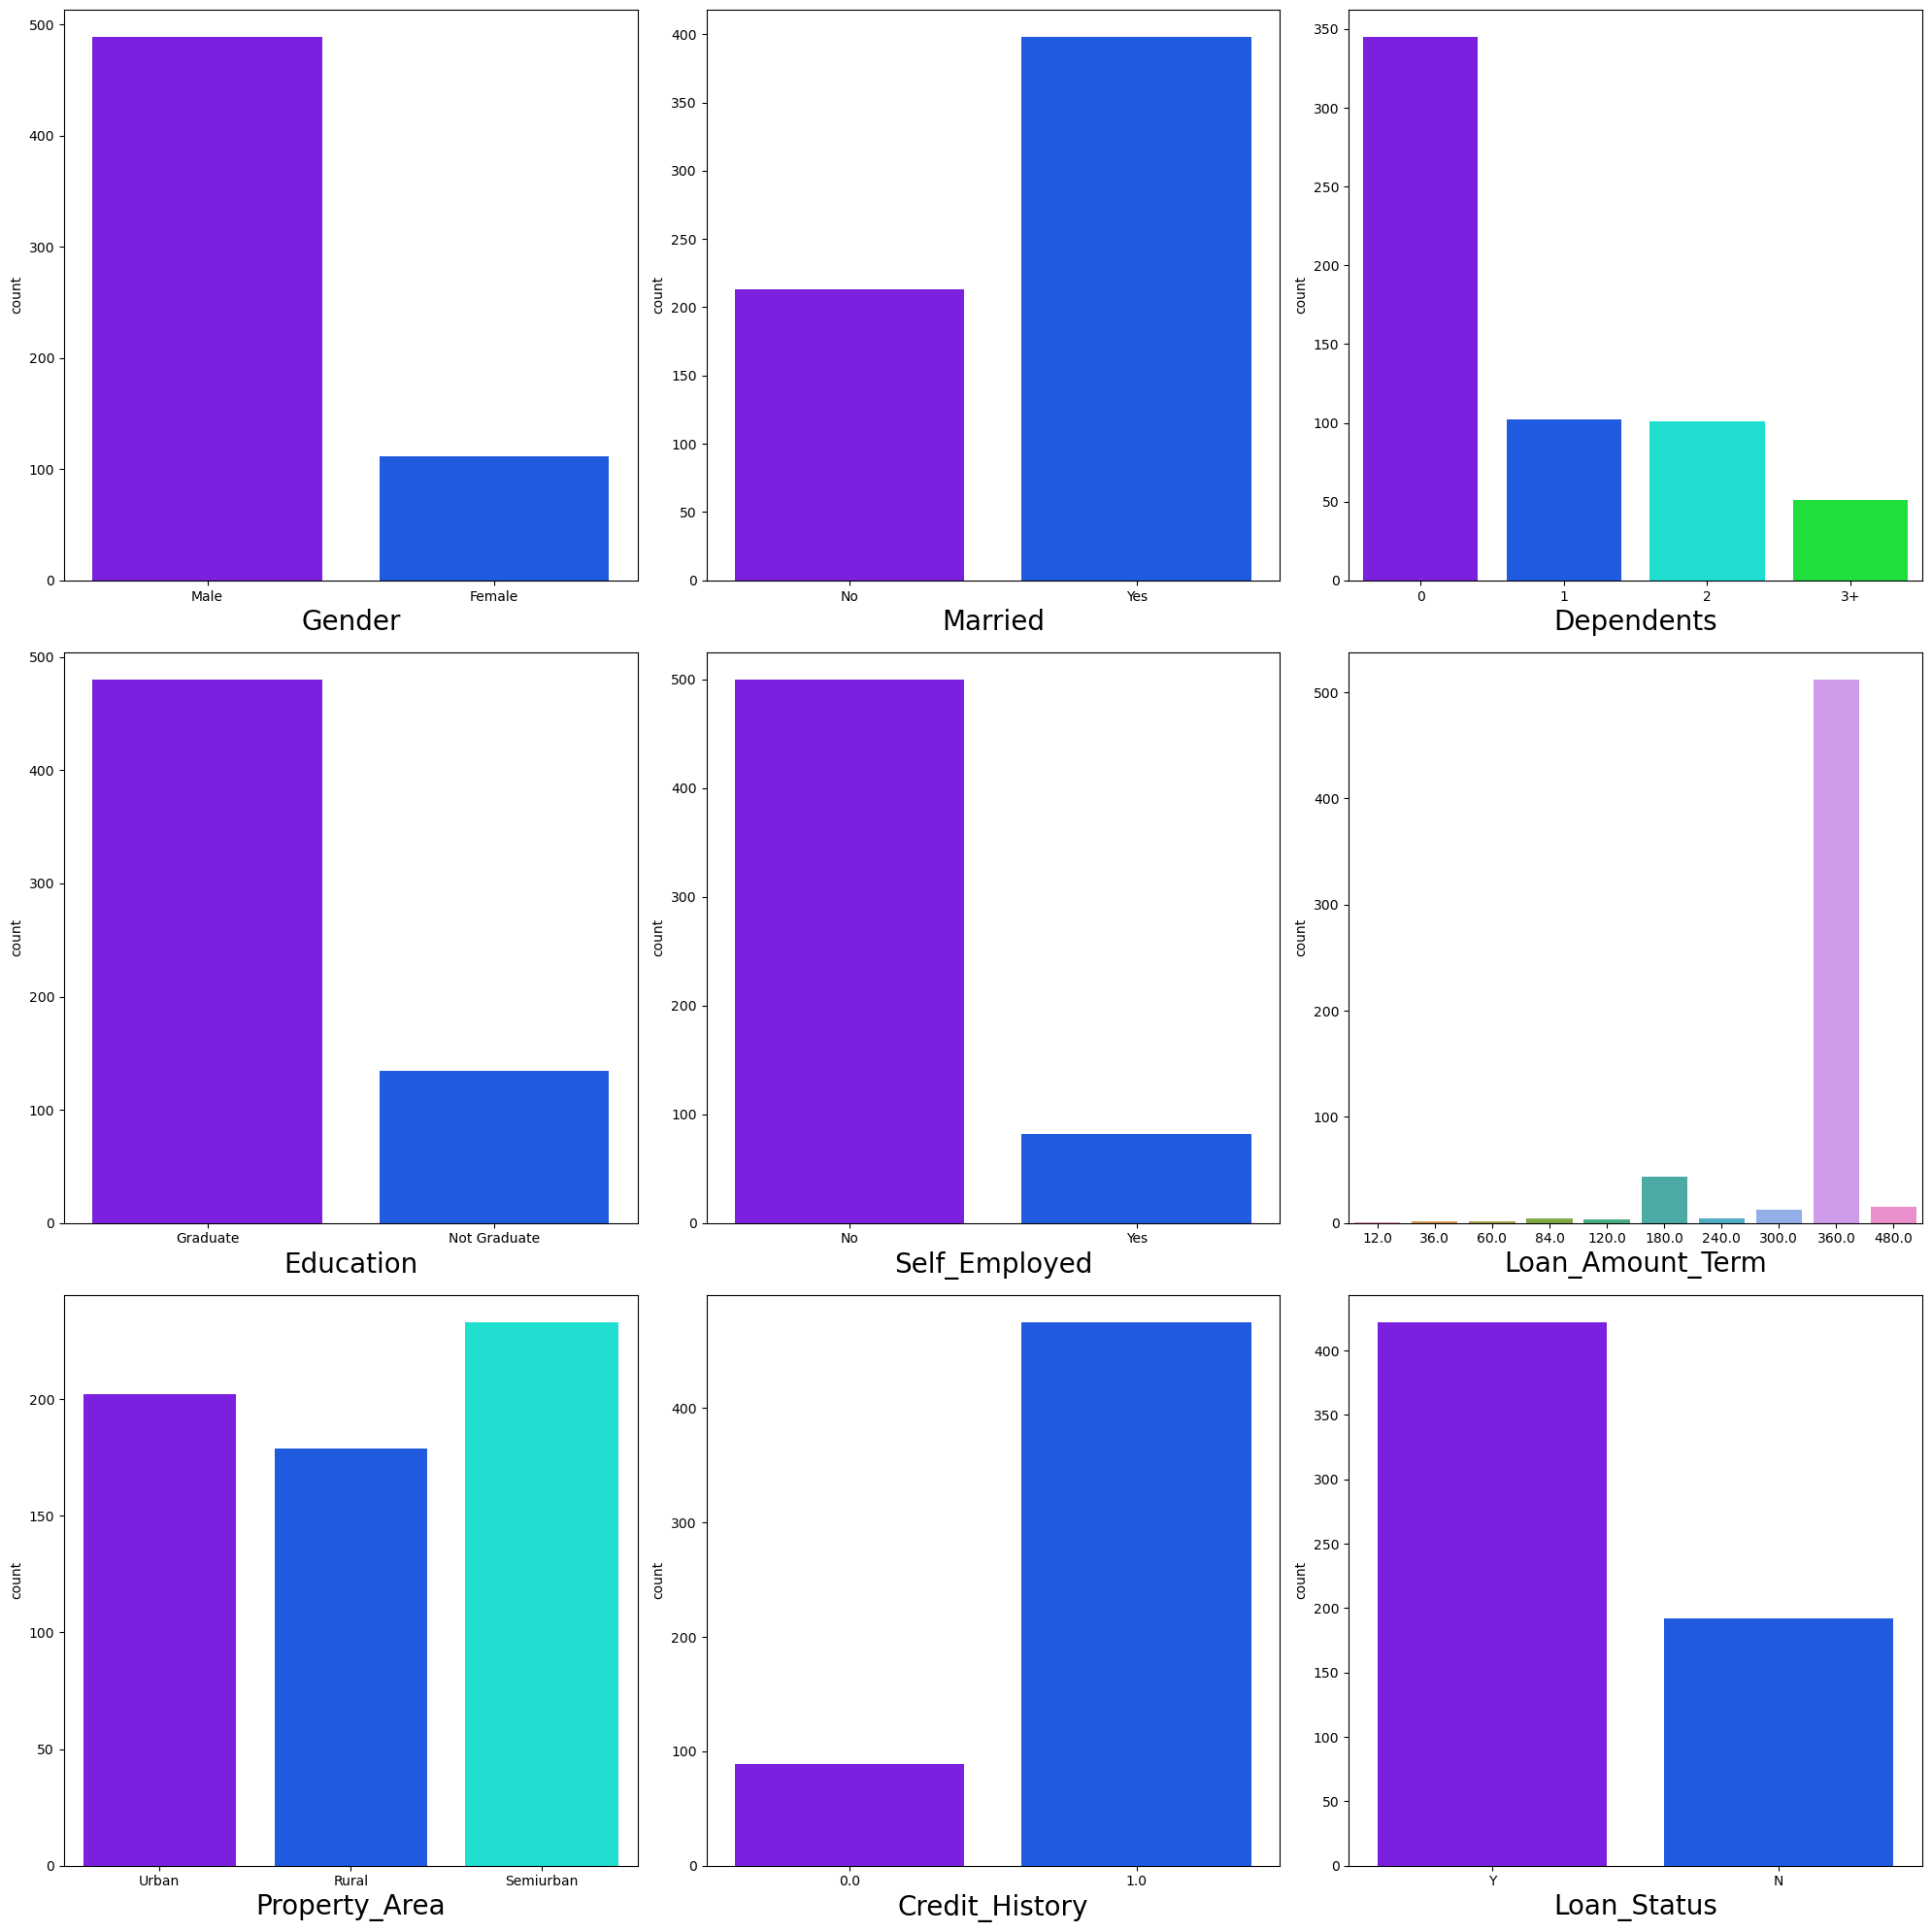

In [17]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
category=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(x=i,data=df)
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

1. The data reveals a significant gender disparity within loan applicants, with approximately 80% identifying as male.  A comparative analysis of loan amounts across genders would be insightful, particularly to assess potential discrepancies in loan approval based on gender.
2. Given the relatively low proportion of self-employed applicants (20%), it would be beneficial to explore the relationship between income and loan approval specifically for non-self-employed individuals.  This analysis could potentially identify a benchmark income range that serves as an indicator for loan approval. Additionally, investigating loan requirements for both self-employed and non-self-employed applicants could yield valuable insights.
3. The data also indicates a prevalence of married applicants (nearly 70%) and graduates (75%).  Furthermore, almost 60% of applicants have no dependents.  In terms of geographic distribution, most applicants reside in semi-urban areas, followed by urban and rural areas.
4. Encouragingly, a positive credit history is reported by 80% of applicants, which is often considered a positive factor for loan approval.  Reflecting this trend, nearly 70% of loan applications are ultimately approved.

### Imputation of Missing values

#### Imputation details :

- Loan Amount: The median value was employed to impute missing entries within the loan amount feature.
- Loan Term: Due to the maximum loan term being 360 months, any missing values in this feature were replaced with 360 months.
- Categorical Features: For categorical features including Credit History, Self Employed, Dependents, Gender, and Married, the mode (most frequent value) was used to fill in missing entries.

In [18]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [19]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


#### Following the imputation process, the dataset no longer contains any missing values.

In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


- Income (applicant and coapplicant) and loan amount distributions are likely skewed and contain outliers. (based on standard deviation and percentiles)
- Credit history is categorical and statistical measures don't apply.
- Loan tenures range from 1 to 40 years (12 to 480 months).
- Applicant income ranges from 150 to 81000.

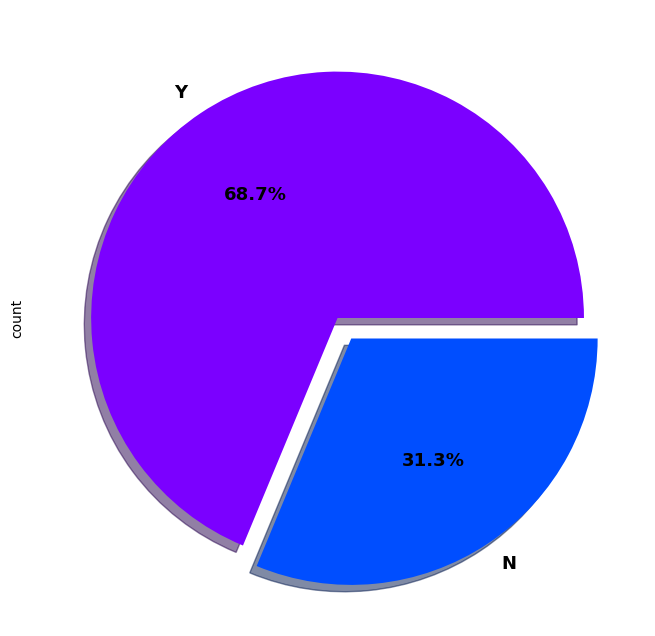

In [22]:
plt.figure(figsize=(18,8))
df['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',textprops ={ 'fontweight': 'bold','fontsize':13},shadow=True)
plt.show()

#### The loan approval rate exhibits a significant class imbalance, with only 68.7% of applicants receiving approval.

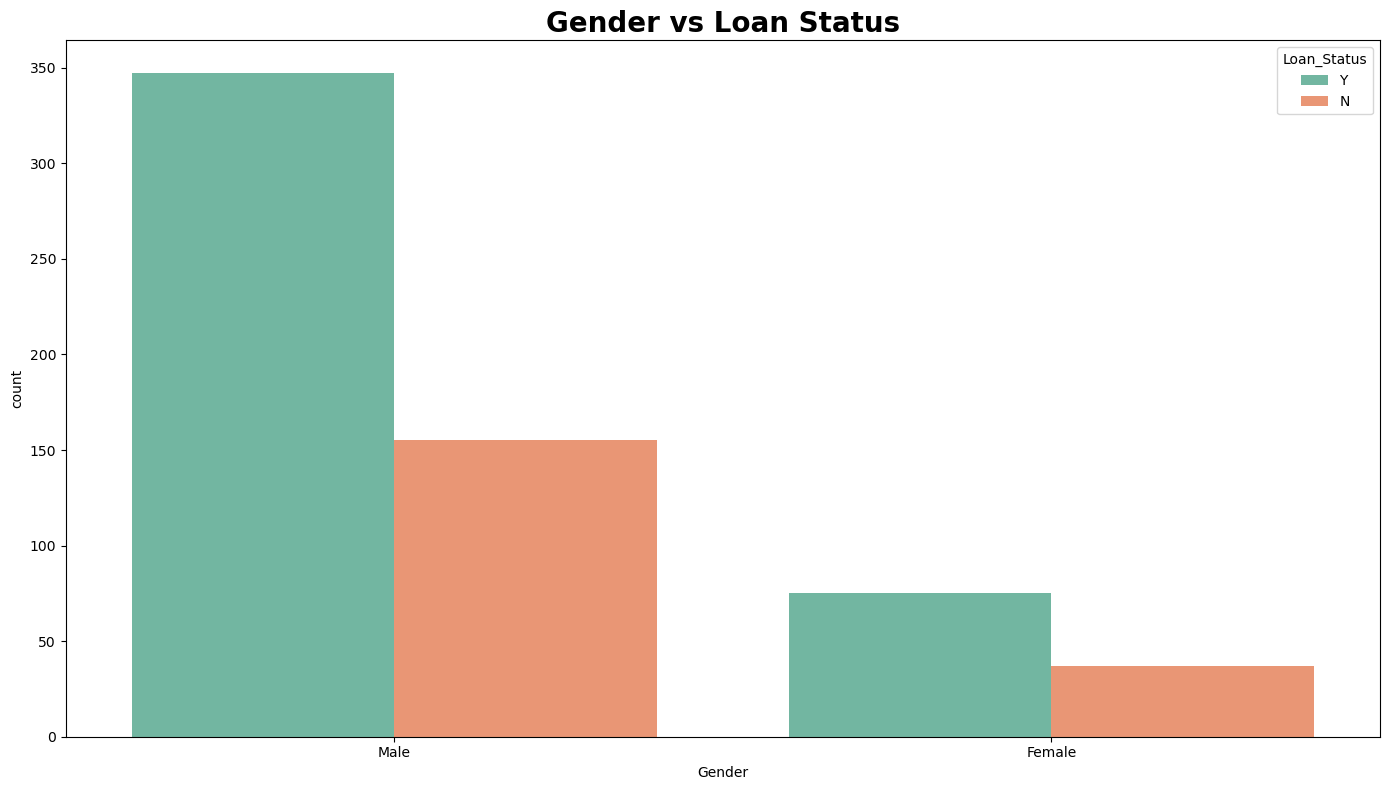

In [42]:
plt.figure(figsize=(14,8))
sns.countplot(x='Gender',hue="Loan_Status",data=df)
plt.title('Gender vs Loan Status',fontsize=20,fontweight='bold')
plt.show()

In [29]:
pd.crosstab(df['Gender'],df["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


#### While 81.8% of applicants are male, the loan approval rate appears to be gender-neutral.  Both genders exhibit a similar approval rate of approximately 65%, suggesting no gender bias in the loan approval process.. No Discrimation on name of Gender done

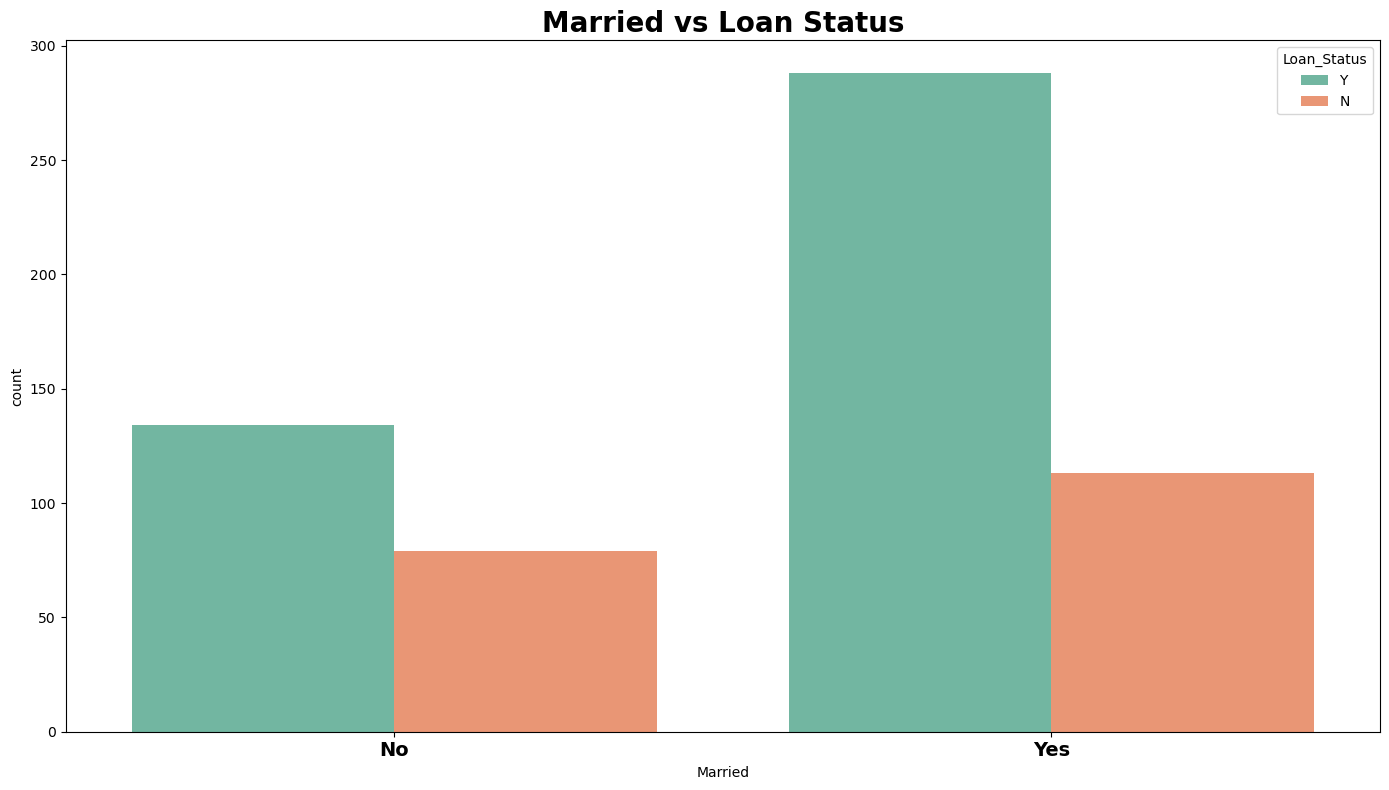

In [41]:
plt.figure(figsize=(14,8))
sns.countplot(x='Married',hue="Loan_Status",data=df)
plt.xticks(fontsize=14,fontweight ='bold')
plt.title('Married vs Loan Status',fontsize=20,fontweight='bold')
plt.show()

In [35]:
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True).style.background_gradient(cmap='gist_rainbow_r')

#### An initial analysis based on marital status suggests a potential correlation with loan approval. While the overall approval rate is around 65%, the distribution plot reveals a higher approval rate for married individuals. However, a cross-tabulation analysis unveils a more nuanced picture. Unmarried women appear to have a better chance of approval compared to married women. Conversely, married men seem to have a higher approval rate than unmarried men. This intriguing disparity necessitates further investigation into other factors such as education, employment, and income that might influence the loan approval decision.

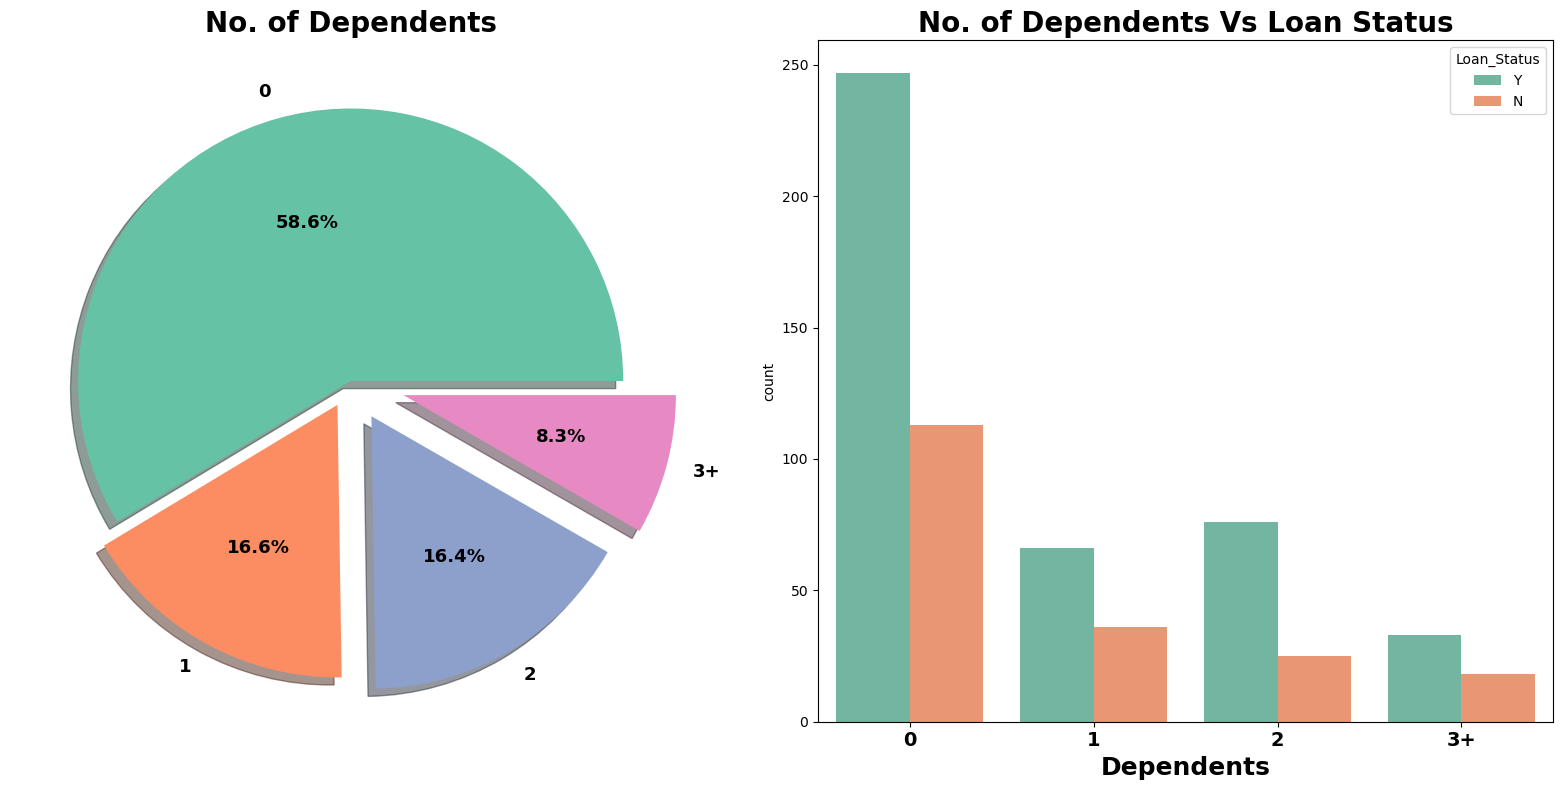

In [38]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No. of Dependents', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Dependents',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('No. of Dependents Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [39]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True).style.background_gradient(cmap='summer_r')

In [40]:
pd.crosstab([df['Dependents'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

#### The analysis of dependents reveals interesting patterns. The majority (58.6%) of applicants have no dependents, while 33% have either one or two. It would be insightful to investigate if the loan amount requirement increases with the number of dependents.  Furthermore, a gender disparity emerges when considering dependents and loan approval. Among females, those with no dependents have a higher approval rate compared to those with dependents.  For males, the highest approval rate is observed with zero dependents, followed by those with two dependents. These findings warrant further exploration to understand the interplay between dependents, loan amount requirements, and gender in the loan approval process.

TypeError: Axes.set_title() missing 1 required positional argument: 'label'

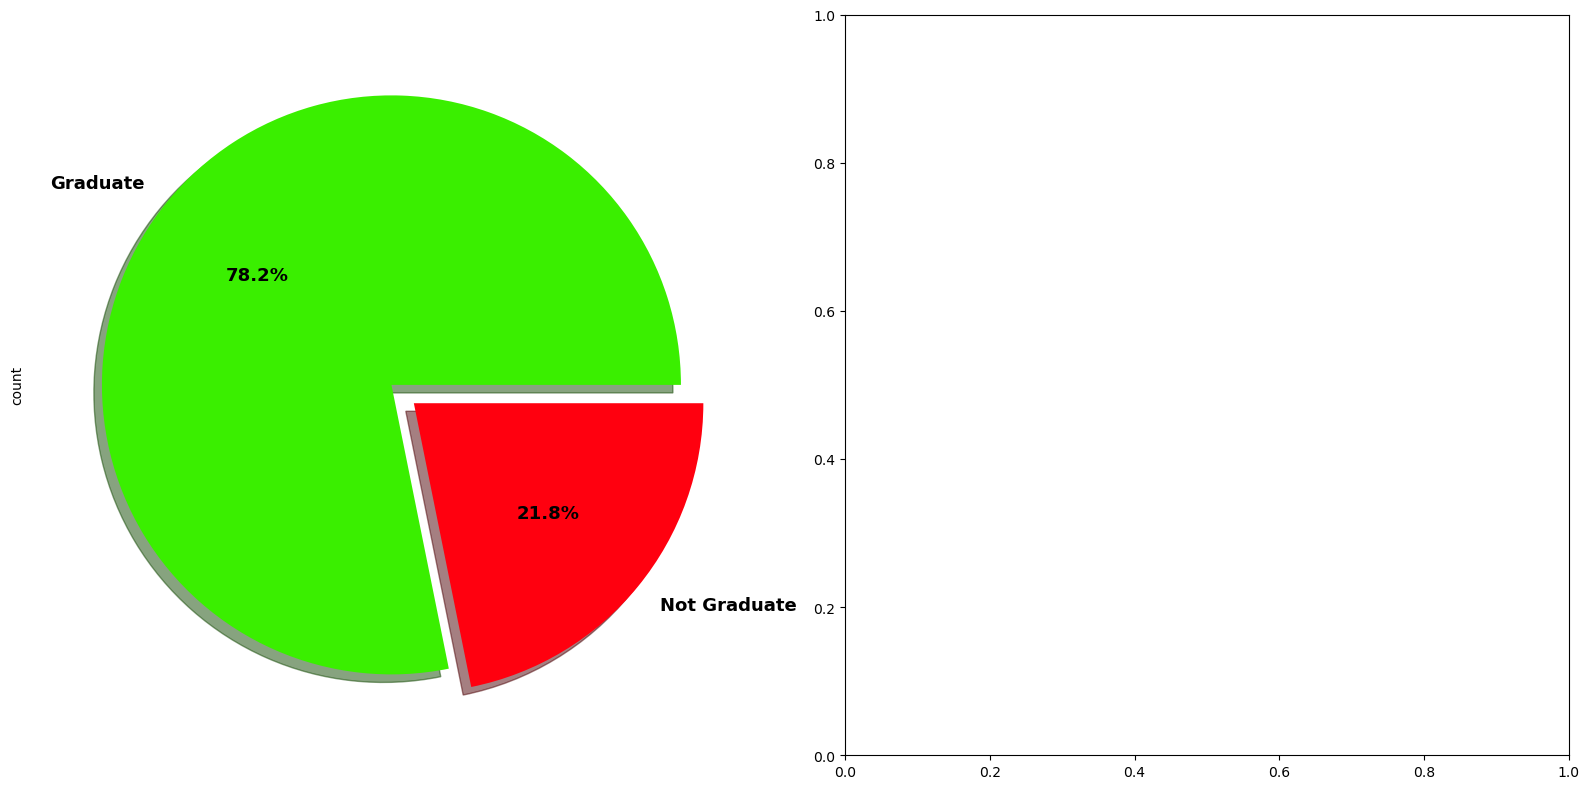

In [46]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('prism')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title(x='Education', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Count')
sns.countplot('Education',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

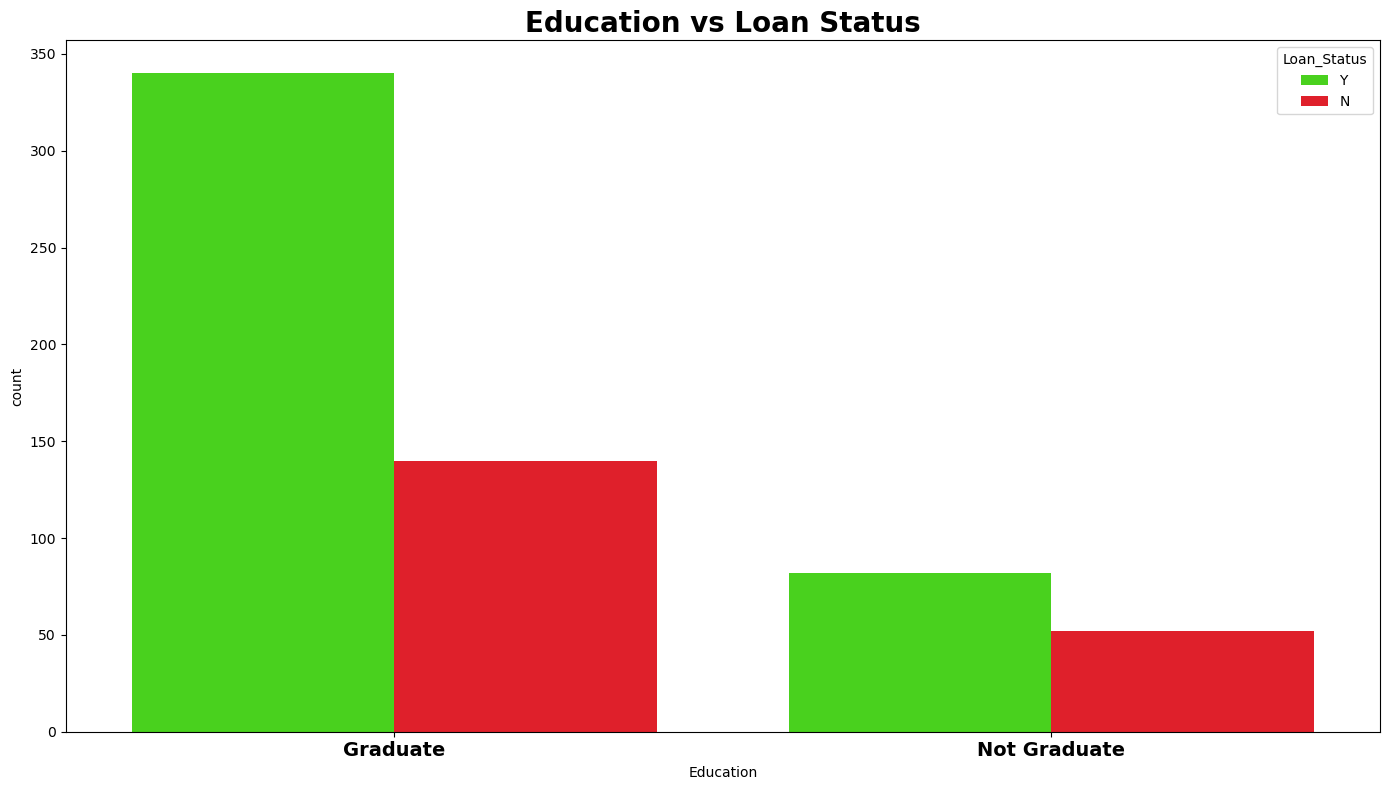

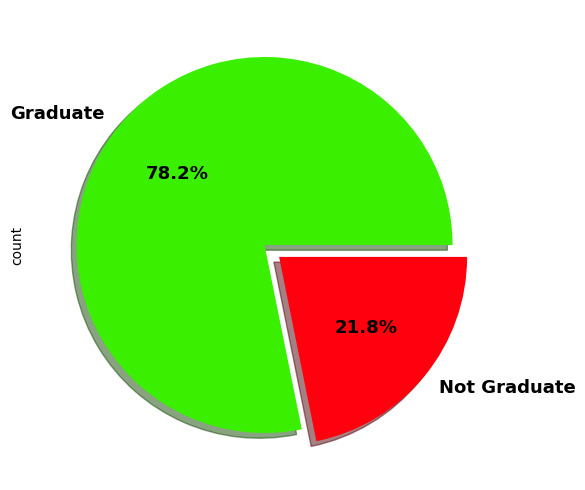

In [51]:
plt.figure(figsize=(14,8))
sns.countplot(x='Education',hue="Loan_Status",data=df)
plt.xticks(fontsize=14,fontweight ='bold')
plt.title('Education vs Loan Status',fontsize=20,fontweight='bold')

plt.figure(figsize=(13,5))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',textprops ={ 'fontweight': 'bold','fontsize':13},shadow=True)
plt.show()


In [52]:
 pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

#### Educational attainment appears to be a positive factor in loan approval.  Individuals with a graduate degree exhibit a higher likelihood of approval, regardless of their gender.

## Encoding Categorical Data

In [53]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


## Feature selection and Engineering

### 1. Outliers Detection and Removal

In [55]:
Numerical_data =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

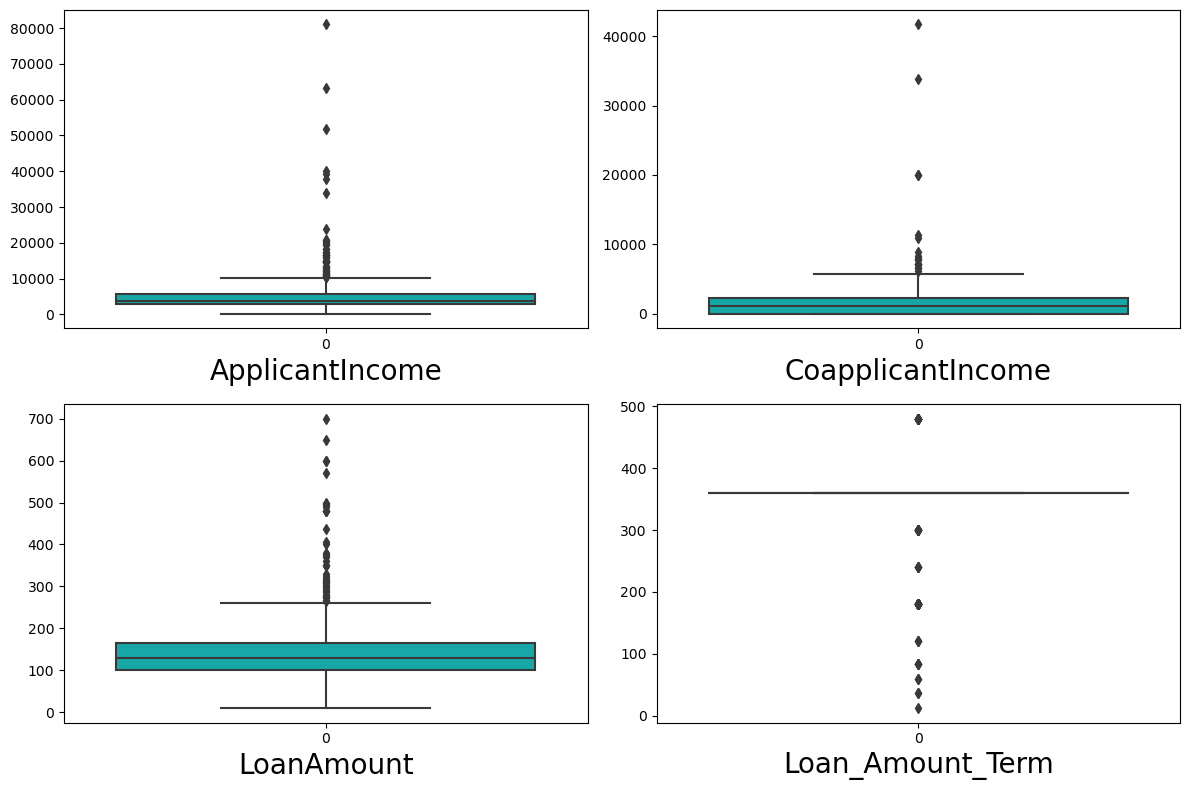

In [57]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical_data:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

#### A boxplot visualization reveals the presence of outliers within the dataset.

### Dropping Unnescessary columns

In [58]:
df.drop(["Loan_ID"], axis=1, inplace=True)

In [59]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [60]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

### Removing Outliers

In [61]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


In [62]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((614-577)/614)*100,'%')

Percentage Data Loss : 6.026058631921824 %


### 2. Skewness of features

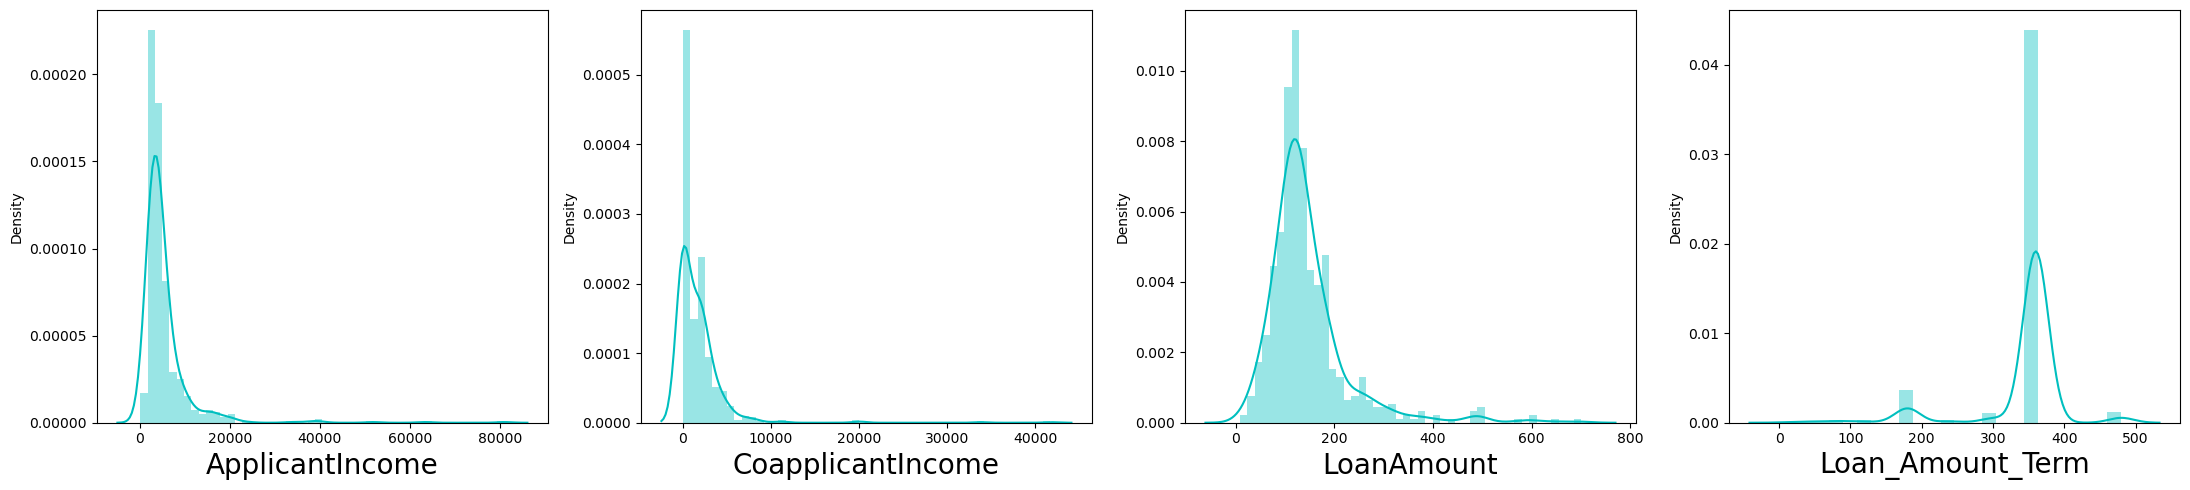

In [64]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical_data:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='c')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [65]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

#### The exploration of the data identified skewness in the numerical features: applicant income, coapplicant income, and loan amount.  This property, skewness, is not applicable to the categorical features in the dataset, so they will be excluded from the transformation process.  To address the skewness in the numerical features, we will employ the Yeo-Johnson transformation method.

In [66]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [67]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.544331,-1.102837,-0.025462
1,0.170974,0.750578,-0.025462
2,-0.499955,-1.102837,-1.339826
3,-0.743873,0.891686,-0.155876
4,0.582817,-1.102837,0.170931


In [68]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.020831
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

The skewness of the numerical variables falls within an acceptable range, indicating a relatively symmetrical distribution.

## 3. Corrleation

In [69]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.087227,0.219590,0.142137,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.016968,0.312596,0.179350,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.111770,-0.002021,0.158592,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.178206,0.038406,-0.149533,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.185468,-0.089864,0.111002,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.087227,0.016968,0.111770,-0.178206,0.185468,1.000000,-0.367287,0.483447,-0.030586,0.012667,-0.029386,0.013568
CoapplicantIncome,0.219590,0.312596,-0.002021,0.038406,-0.089864,-0.367287,1.000000,0.136998,0.012502,0.007486,-0.055421,0.056869
LoanAmount,0.142137,0.179350,0.158592,-0.149533,0.111002,0.483447,0.136998,1.000000,0.081971,-0.016884,-0.092640,-0.038533
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.030586,0.012502,0.081971,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,0.012667,0.007486,-0.016884,-0.004705,1.000000,0.001963,0.540556


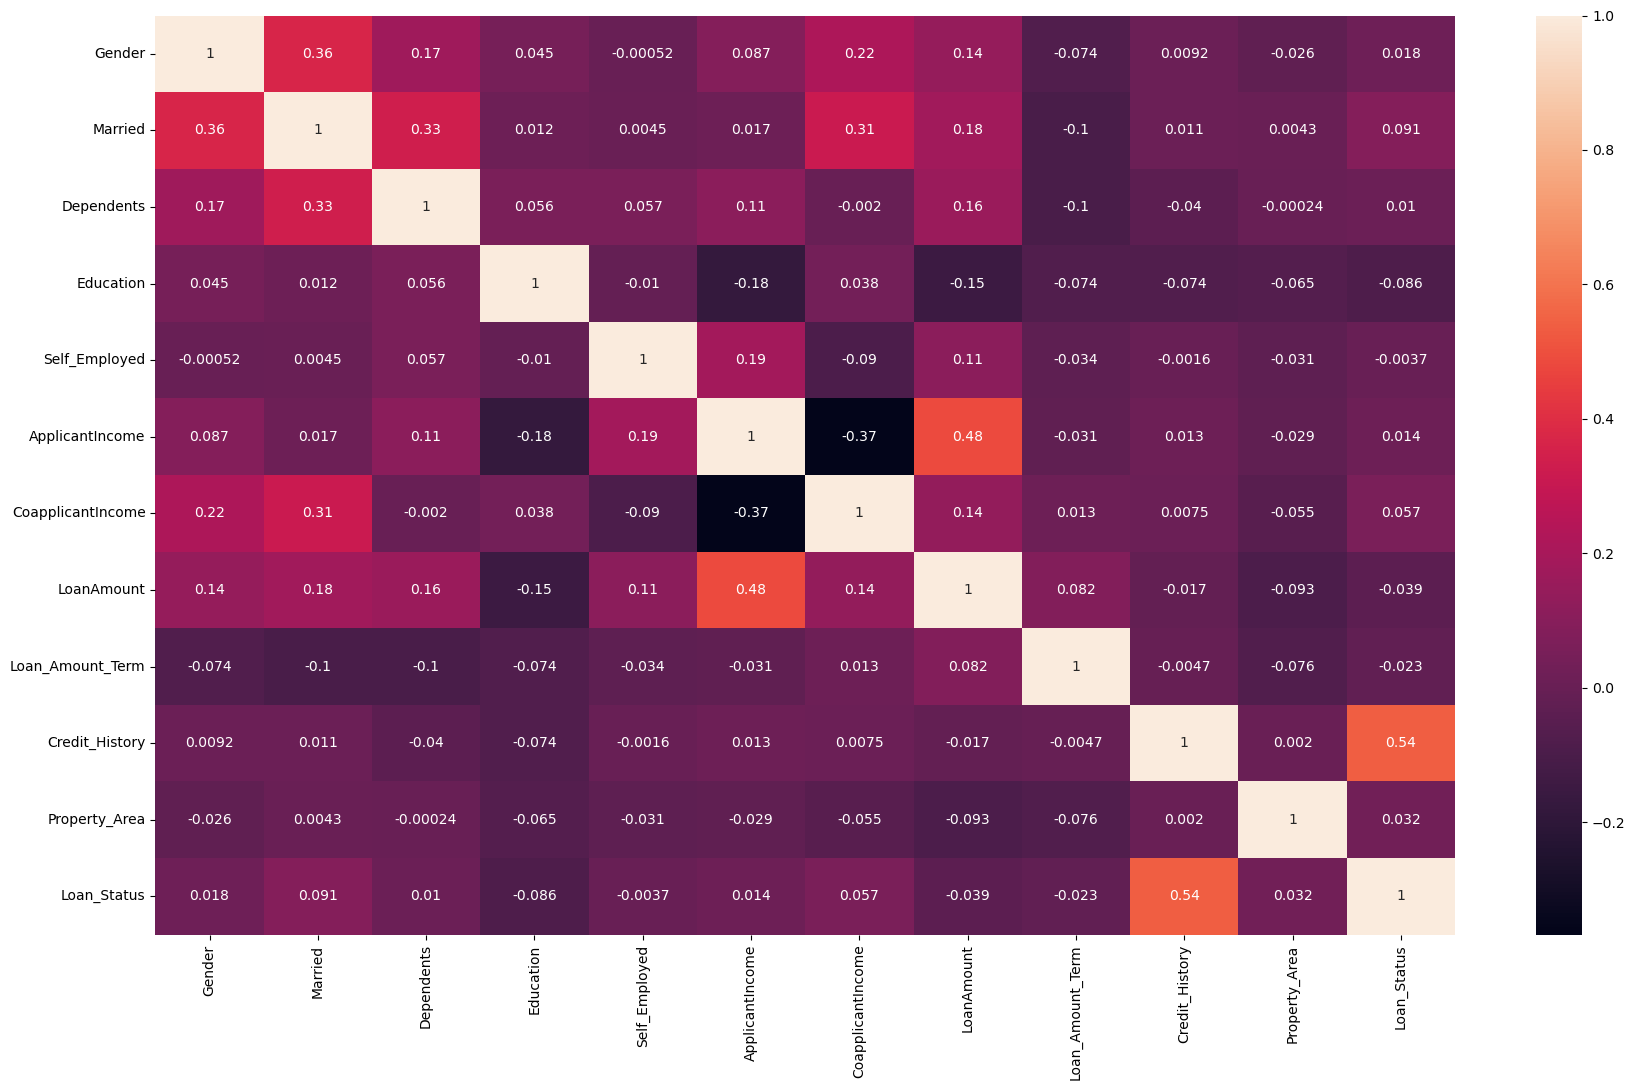

In [71]:
plt.figure(figsize=(18,11))
sns.heatmap(df.corr(),annot=True)
plt.show()

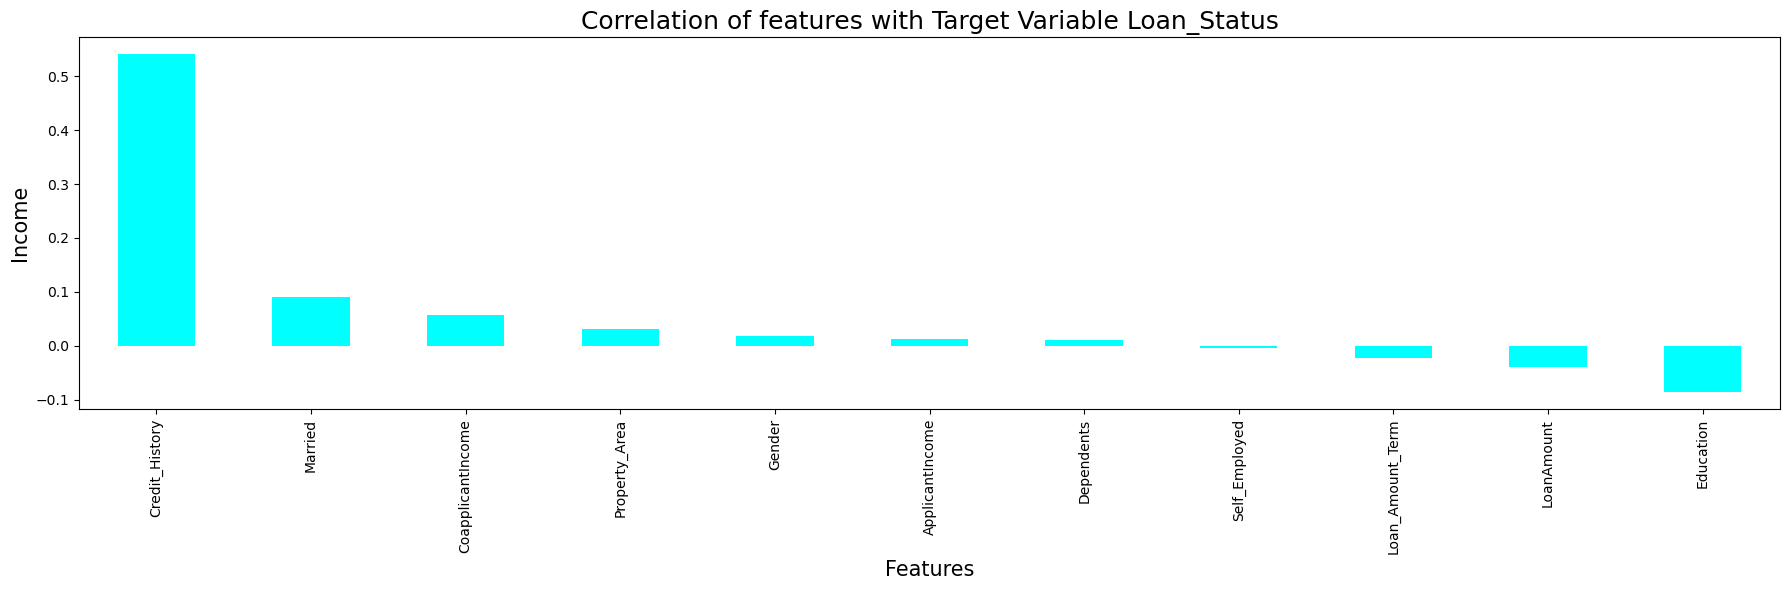

In [72]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'cyan')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

#### The analysis revealed weak to moderate correlations between most features and the target variable. However, Credit History stands out as an exception, exhibiting a stronger association with the target variable.

### 4. Checking Multicollinearity between features using variance_inflation_factor

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,6.073900,Gender
1,3.947111,Married
2,1.807936,Dependents
3,1.341402,Education
4,1.192584,Self_Employed
5,1.849543,ApplicantIncome
6,1.553493,CoapplicantIncome
7,1.603207,LoanAmount
8,9.223781,Loan_Amount_Term
9,8.995760,Credit_History


#### All features VIF is within permissible limit of 10.

## 5. Balanceing Imbalanced target feature

In [74]:
df.Loan_Status.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

#### Given the inherent class imbalance in the target variable, it is necessary to implement data balancing techniques to address this issue.

## We will leverage the Synthetic Minority Oversampling Technique (SMOTE) to address the class imbalance in the target variable.

In [76]:
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [77]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [78]:
Y.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

#### The class imbalance issue within the target variable has been effectively mitigated through the application of balancing techniques. This ensures a more balanced representation of all categories, thereby reducing the potential for bias in the machine learning model.

### Standard Scaling

In [79]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (590, 11)
Training target vector size: (590,)
Test feature matrix size: (254, 11)
Test target vector size: (254,)


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7834645669291339 on Random_state 27


In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=27, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7834645669291339


Confusion matrix of Logistics Regression : 
 [[ 71  43]
 [ 12 128]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.86      0.62      0.72       114
           1       0.75      0.91      0.82       140

    accuracy                           0.78       254
   macro avg       0.80      0.77      0.77       254
weighted avg       0.80      0.78      0.78       254



### Finding Optimal value of n_neighbors for KNN

In [85]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = []
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  
    y_pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(Y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.5097475058154177
RMSE value for k=  2 is: 0.5784856690457756
RMSE value for k=  3 is: 0.5174133119983201
RMSE value for k=  4 is: 0.5612135332663137
RMSE value for k=  5 is: 0.48602517675625084
RMSE value for k=  6 is: 0.5287036590143084
RMSE value for k=  7 is: 0.4778561045889373
RMSE value for k=  8 is: 0.4980276057238114
RMSE value for k=  9 is: 0.48602517675625084
RMSE value for k=  10 is: 0.5174133119983201
RMSE value for k=  11 is: 0.5058710426690024
RMSE value for k=  12 is: 0.5249671905758515
RMSE value for k=  13 is: 0.5097475058154177
RMSE value for k=  14 is: 0.5249671905758515
RMSE value for k=  15 is: 0.5097475058154177
RMSE value for k=  16 is: 0.5360984749121653
RMSE value for k=  17 is: 0.5212039363887102
RMSE value for k=  18 is: 0.5174133119983201
RMSE value for k=  19 is: 0.5249671905758515
RMSE value for k=  20 is: 0.5249671905758515
RMSE value for k=  21 is: 0.5174133119983201
RMSE value for k=  22 is: 0.5433926670016638
RMSE value for k=

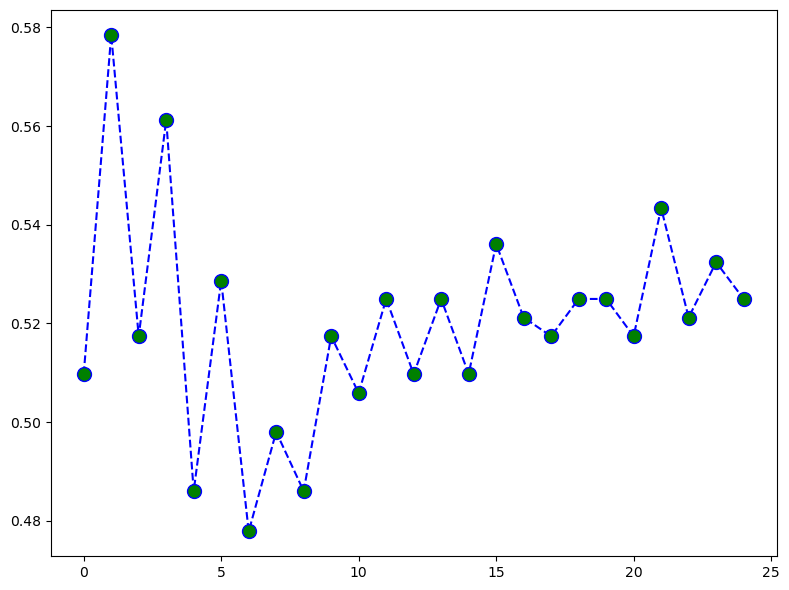

In [86]:
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

#### Based on the analysis of the RMSE curve, k=7 appears to be the optimal number of neighbors. This is because k=7 corresponds to the minimum RMSE value on the graph, indicating the best performance for the KNN model.

### Descisin Tree Classifier

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=27, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.7637795275590551


Confusion matrix of DecisionTreeClassifier : 
 [[ 94  20]
 [ 40 100]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.70      0.82      0.76       114
           1       0.83      0.71      0.77       140

    accuracy                           0.76       254
   macro avg       0.77      0.77      0.76       254
weighted avg       0.77      0.76      0.76       254



### Random Forest Classifier

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=27, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.8110236220472441


Confusion matrix of RandomForestClassifier : 
 [[ 88  26]
 [ 22 118]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.80      0.77      0.79       114
           1       0.82      0.84      0.83       140

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.81      0.81      0.81       254



## Extra Trees Classifier

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=27, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.8110236220472441


Confusion matrix of ExtraTreesClassifier : 
 [[ 90  24]
 [ 24 116]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       114
           1       0.83      0.83      0.83       140

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.81      0.81      0.81       254



## Cross validation

In [95]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('-'*100)



Cross Validation Score LogisticRegression() :

Score : [0.70414201 0.72189349 0.74556213 0.73964497 0.76190476]
Mean Score : 0.7346294730910116
Std deviation : 0.019901307066517975


----------------------------------------------------------------------------------------------------


Cross Validation Score SVC() :

Score : [0.69230769 0.74556213 0.75739645 0.76331361 0.73214286]
Mean Score : 0.7381445477599324
Std deviation : 0.025283099227115514


----------------------------------------------------------------------------------------------------


Cross Validation Score GaussianNB() :

Score : [0.66863905 0.71597633 0.75739645 0.69822485 0.75595238]
Mean Score : 0.7192378134685826
Std deviation : 0.034107058894965195


----------------------------------------------------------------------------------------------------


Cross Validation Score DecisionTreeClassifier() :

Score : [0.70414201 0.73372781 0.73964497 0.72189349 0.76190476]
Mean Score : 0.7322626091856861
Std deviation :

#### Our evaluation metrics, including accuracy and cross-validation, indicate that both Random Forest and Extra Trees classifiers achieve high performance. However, due to the potential for increased bias introduced by the additional randomness in Extra Trees, we will proceed with the Random Forest model. This choice is particularly relevant for our dataset, as the bias introduced by Extra Trees might be more pronounced with smaller datasets.

#### To optimize the performance of the Random Forest model, we will employ hyperparameter tuning techniques. This process will involve systematically adjusting various model parameters to achieve the best possible results on the validation set. The final model selected for deployment will be the tuned Random Forest model.

In [106]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 'max_features': ['auto', 'log2'], 'criterion':['gini','entropy'],'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [107]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.771 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.720 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.703 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.720 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [108]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 60}

In [109]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 60, max_depth=20 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8070866141732284


## Saving model

In [111]:
import joblib
joblib.dump(Final_mod,'Loan_Status_Final.pkl')

['Loan_Status_Final.pkl']